In [42]:
import pandas as pd
import numpy as np

**Load the Data**

In [3]:
data = pd.read_csv('/content/Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.shape

(30, 2)

In [5]:
#view one sample from data
data.sample()

,YearsExperience,Salary
4,2.2,39891.0


In [6]:
data.mean()

,0
YearsExperience,5.313333
Salary,76003.000000


In [7]:
data.dtypes

,0
YearsExperience,float64
Salary,float64


In [8]:
data.shape

(30, 2)

In [10]:
data = data.drop_duplicates()
data.shape

(30, 2)

In [12]:
data.isnull().sum()

,0
YearsExperience,0
Salary,0


In [13]:
#create dependant (y) and independat (x) values
target_feature= 'Salary'
#sepearate feature of target feature
y= data[target_feature]

x=data.drop(target_feature, axis = 1)

In [17]:
x.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [16]:
y.head()

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0


In [18]:
# data visualization before train the model

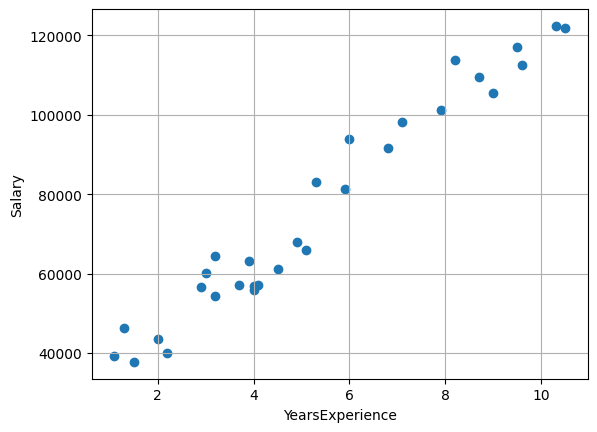

In [19]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.grid()
plt.show()

<h1>Split data set to train and test</h1>

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
from os import X_OK
# test size 0.3
# train data is 70 %
# test data is 30 % from all data
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [27]:
x_test.shape, y_test.shape

((9, 1), (9,))

In [28]:
x_train.shape, y_train.shape

((21, 1), (21,))

<h1>Apply Linear regration on train DataSet</h1>

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
reg = LinearRegression()

In [32]:
reg.fit(x_train,y_train)

LinearRegression()

<h1>Get the Parameters</h1>

In [33]:
#y=mx+c
# b is intercept parameter
# m is coeficient (slope)
inter = reg.intercept_
coe = reg.coef_
print('Intercept b is = ',inter)
print('coeeficient m i = ',coe)

Intercept b is =  26777.391341197625
coeeficient m i =  [9360.26128619]


<h1>Apply Model on test dataset to get the predict the value</h1>

In [34]:
y_pred=reg.predict(x_test)

In [35]:
y_pred.shape

(9,)

<h1>To compaire actual and pridicted value</h1>

In [36]:
data1=pd.DataFrame({'Actual':y_test, 'pridict':y_pred})
data1

,Actual,pridict
2,37731.0,40817.783270
28,122391.0,123188.082589
13,57081.0,65154.462615
10,63218.0,63282.410357
26,116969.0,115699.873560
24,109431.0,108211.664531
27,112635.0,116635.899689
11,55794.0,64218.436486
17,83088.0,76386.776158


In [38]:
data2=pd.DataFrame({'Actual':y_test, 'pridict':y_pred, 'variance':y_pred-y_test})

In [39]:
data2

,Actual,pridict,variance
2,37731.0,40817.783270,3086.783270
28,122391.0,123188.082589,797.082589
13,57081.0,65154.462615,8073.462615
10,63218.0,63282.410357,64.410357
26,116969.0,115699.873560,-1269.126440
24,109431.0,108211.664531,-1219.335469
27,112635.0,116635.899689,4000.899689
11,55794.0,64218.436486,8424.436486
17,83088.0,76386.776158,-6701.223842


In [40]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


**<h1>Pridict</h1>**

In [43]:
# pridicting result on 1.5 years of experiance
pred = np.array([1.5]).reshape(-1,1)

In [45]:
reg.predict(pred)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([40817.78327049])

In [51]:
# y=m*x+c
y=9360.26128619*1.5+26777.391341197625
print(y)

40817.78327048263


<h1>Visualization</h1>

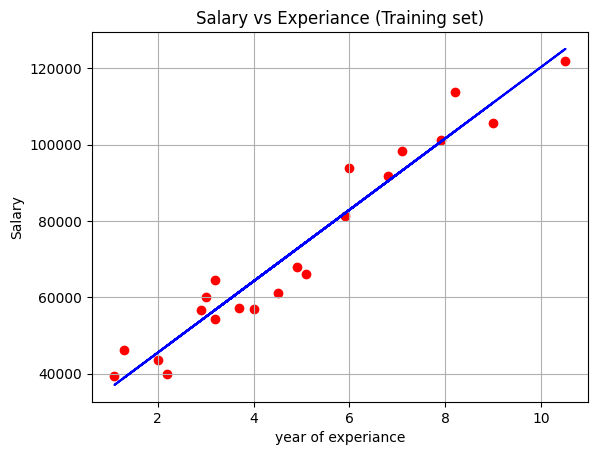

In [55]:
#Visualizing our training model
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train, reg.predict(x_train),color='blue')
plt.title('Salary vs Experiance (Training set)')
plt.xlabel('year of experiance')
plt.ylabel('Salary')
plt.grid()
plt.show()

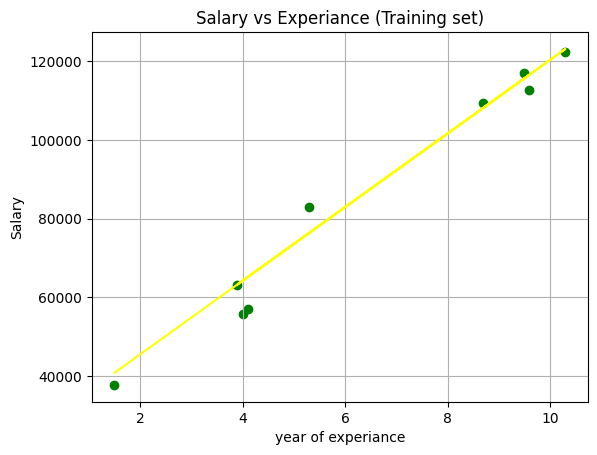

In [57]:
plt.scatter(x_test,y_test, color='green')
plt.plot(x_test, reg.predict(x_test),color='yellow')
plt.title('Salary vs Experiance (Training set)')
plt.xlabel('year of experiance')
plt.ylabel('Salary')
plt.grid()
plt.show()

<h1>Evolution matrix of Regeration Algorithunm</h1>

In [59]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)*100
print('score is: ',score)

score is:  97.4099340721351


In [60]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print('Mean Absolute Error : ' ,mean_absolute_error(y_test,y_pred) )
print('Mean Squared Error : ' ,mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error : ' ,np.sqrt(mean_squared_error(y_test,y_pred)))

Mean Absolute Error :  3737.417861878896
Mean Squared Error :  23370078.800832972
Root Mean Squared Error :  4834.260936361728
